# GR5291 Final Project

## Group Member: Ares Wang(yw3626), Gexin Chen(gc2936), Zixuan Liu(zl3055)

In [2]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.stats import chi2_contingency

In [3]:
train_data = pd.read_csv('../data/train.csv',index_col=0)
test_data = pd.read_csv('../data/test.csv', index_col=0)

# 1. Exploratory Data Analysis

In [4]:
# Get the size of data
print(train_data.shape,test_data.shape)

(103904, 24) (25976, 24)


In [5]:
# Obtain the summary statistics of the variables
train_data.describe().T
#test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [6]:
# Return the data types
train_data.dtypes
#test_data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

(45025, 24)
(58879, 24)


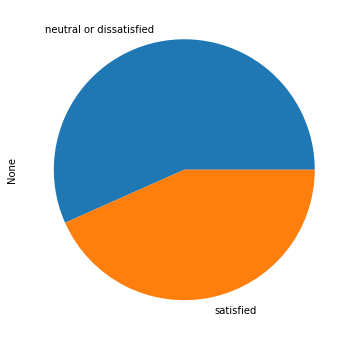

In [7]:
# Find the distribution of the target variable
fig,ax=plt.subplots(1,1,figsize=(14,6))
train_data.groupby('satisfaction').size().plot(kind='pie')
print(train_data[train_data['satisfaction']=='satisfied'].shape)
print(train_data[train_data['satisfaction']=='neutral or dissatisfied'].shape)

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

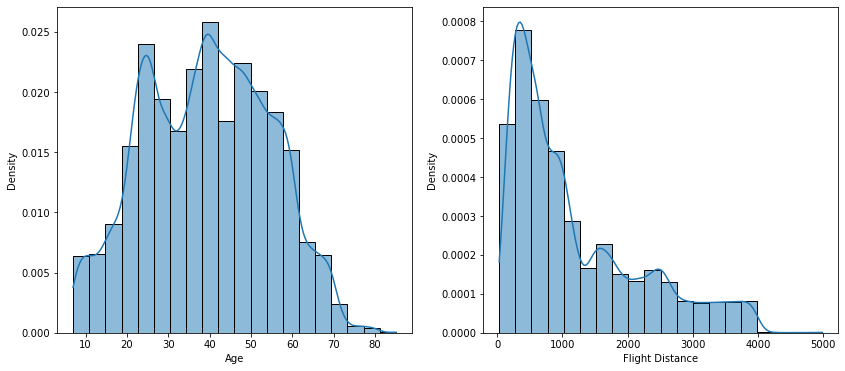

In [13]:
# Visualize numerical variables
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x='Age',data=train_data,ax=ax[0],kde=True,bins=20,stat='density')
sns.histplot(x='Flight Distance',data=train_data,ax=ax[1],kde=True,bins=20,stat='density')

In [11]:
# Measure the skewness and kurtosis
#print(train_data['Age'].agg(['skew','kurtosis']))
#print(train_data['Flight Distance'].agg(['skew','kurtosis']))

skew       -0.004516
kurtosis   -0.719568
Name: Age, dtype: float64
skew        1.109466
kurtosis    0.268535
Name: Flight Distance, dtype: float64


<AxesSubplot:xlabel='Class', ylabel='count'>

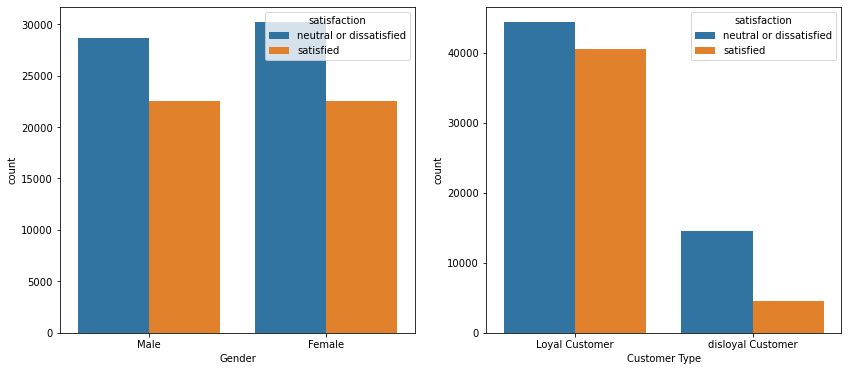

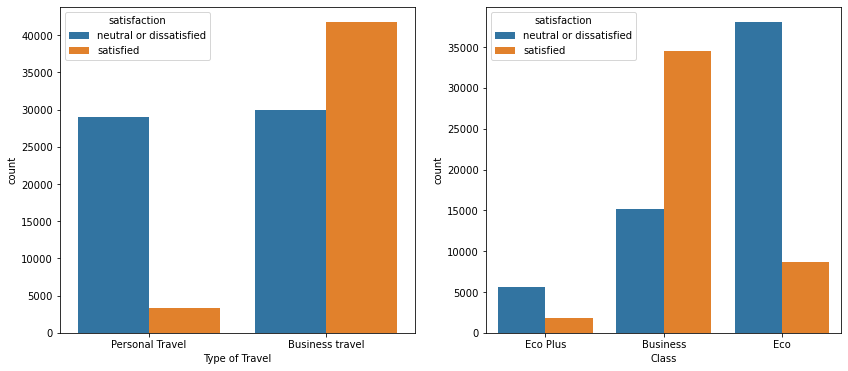

In [12]:
# Visualize categorical variables
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x='Gender',hue='satisfaction',data=train_data,ax=ax[0])
sns.countplot(x='Customer Type',hue='satisfaction',data=train_data,ax=ax[1])
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x='Type of Travel',hue='satisfaction',data=train_data,ax=ax[0])
sns.countplot(x='Class',hue='satisfaction',data=train_data,ax=ax[1])

In [9]:
# Check Missing Values
train_data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
# Check Missing Values
test_data.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

We can see that there exists missing value for feature [Arrival Delay in Minutes]. It is probably because that some questionaires is taken during the flight, so the value of Arrival Delay is not known. 
Therefore, we decide to remove missing values because there is no reasonable estimate for unknown values.

In [11]:
# NAs in Arrival Delay in Minutes
train_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)
test_data.dropna(subset=['Arrival Delay in Minutes'],inplace=True)

# Keep a Copy of Data Before Processing
train_data1 = train_data
test_data1 = test_data

In [12]:
# Transfer String Variables to Categorical Variables
# Gender(0 for Female,1 for Male)
le1 = LabelEncoder()
train_data.Gender = le1.fit_transform(train_data.Gender)
test_data.Gender = le1.transform(test_data.Gender)

# Customer Type(0 for disloyal Customer, 1 for Loyal Customer)
train_data['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)
test_data['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0, 1], inplace=True)

# Type of Travel(0 for Personal travel, 1 for Business Travel)
train_data['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)
test_data['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0, 1], inplace=True)

# Class(0 for Eco, 1 for Eco Plus, 2 for Business)
train_data['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)
test_data['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0, 1, 2], inplace=True)

# Satisifaction (0 for 'Neutral or Unsatisfied'; 1 for 'Satisfied')
train_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)
test_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

<AxesSubplot:>

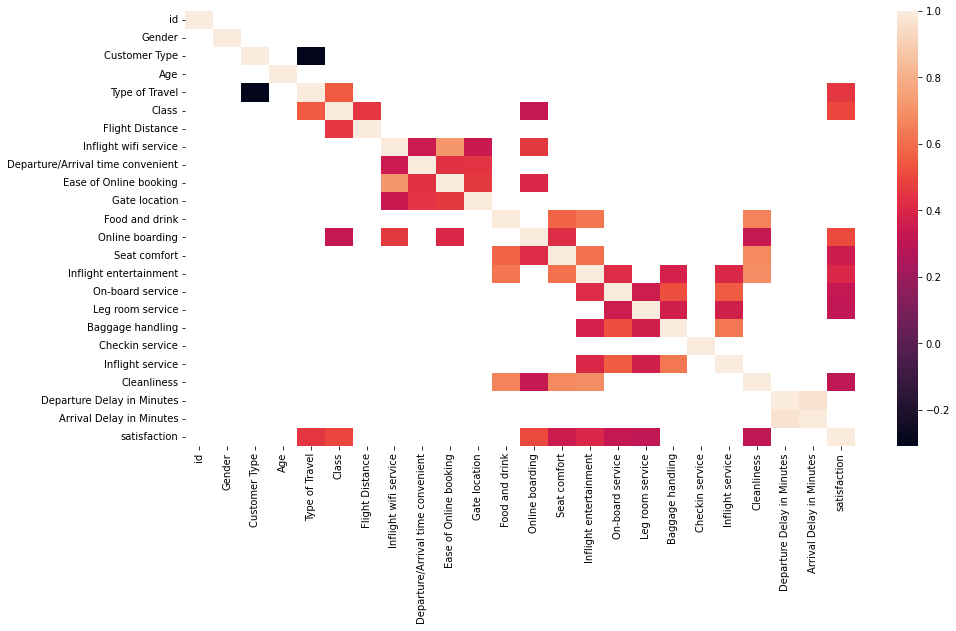

In [13]:
# Investigate Correlation Between Variables
train_corr = train_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(train_corr[train_corr.abs() > 0.3])

<AxesSubplot:>

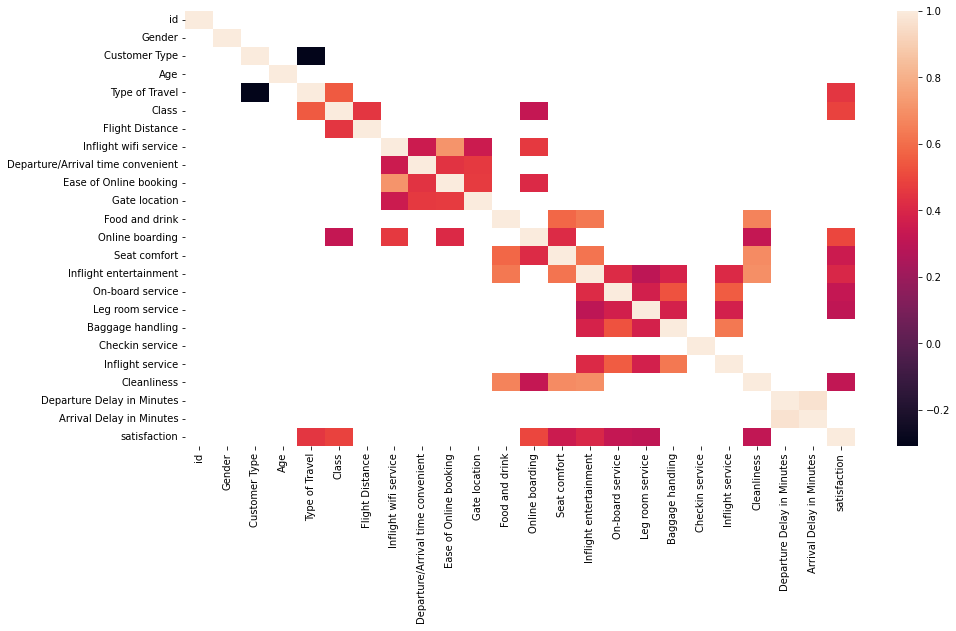

In [14]:
test_corr = test_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(test_corr[test_corr.abs() > 0.3])

<AxesSubplot:>

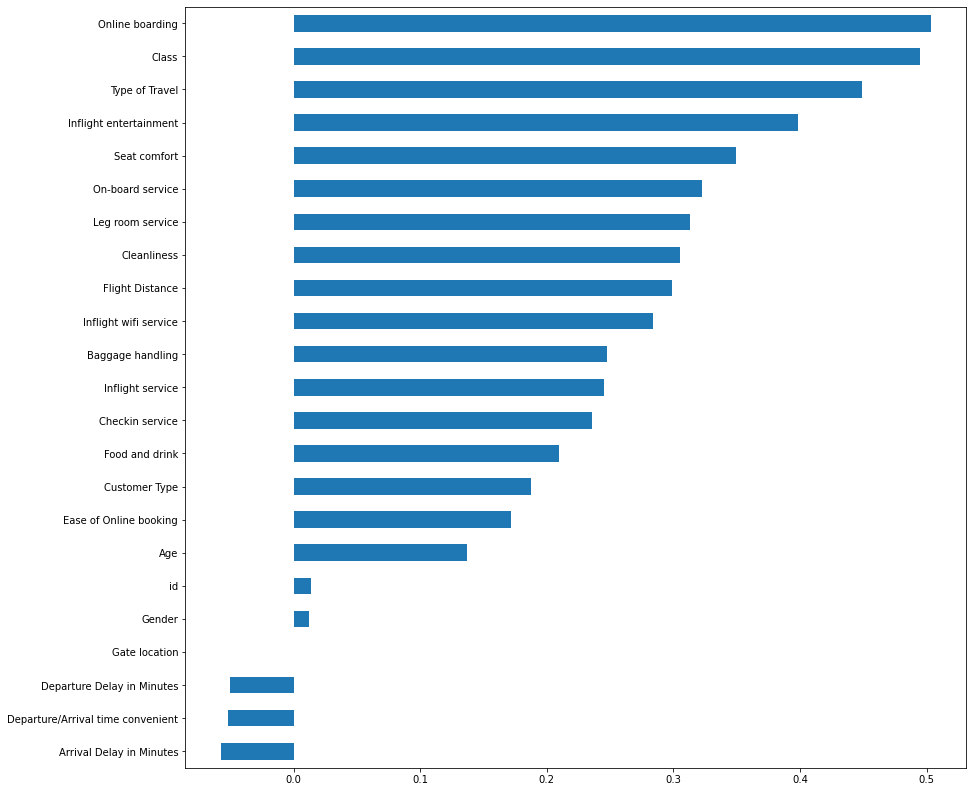

In [15]:
train_data1.corrwith(train_data1['satisfaction']) \
    .sort_values(ascending=True)[:-1] \
    .plot(kind='barh', figsize=(14, 14))


From above, it can be observed that several features are correlated with each others. We will investigate on some correlated features to gain some business insight.

In [16]:
train_corr[train_corr.abs() > 0.4]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Travel,NaN,NaN,NaN,NaN,1.000000,0.545185,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448995
Class,NaN,NaN,NaN,NaN,0.545185,1.000000,0.451495,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494545
Flight Distance,NaN,NaN,NaN,NaN,NaN,0.451495,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inflight wifi service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.715848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure/Arrival time convenient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.437021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ease of Online booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715848,0.437021,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be observed that output variable [satisfaction] is highly correlated with [Type of Travel], [Class], 

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

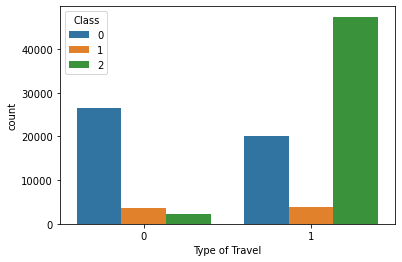

In [17]:
sns.countplot(x = train_data1['Type of Travel'],hue = train_data1['Class'])

In [18]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data1['Type of Travel'], train_data1['Class']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 31790.519736133203, and corresponding p-value is: 0.0.


<AxesSubplot:xlabel='Class', ylabel='count'>

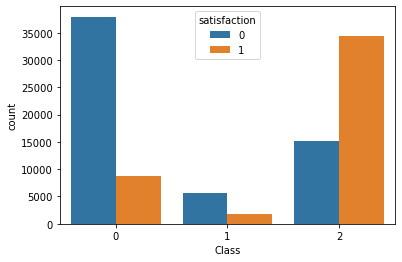

In [19]:
sns.countplot(x = train_data1['Class'],hue = train_data1['satisfaction'])

In [20]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data1['satisfaction'], train_data1['Class']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 26402.22202396346, and corresponding p-value is: 0.0.


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

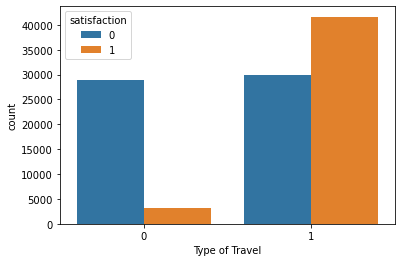

In [21]:
sns.countplot(x = train_data1['Type of Travel'],hue = train_data1['satisfaction'])

In [22]:
stat, p, df, expected = chi2_contingency(pd.crosstab(train_data1['Type of Travel'], train_data1['satisfaction']))
print("The test statistic is: {}, and corresponding p-value is: {}.".format(stat,p))

The test statistic is: 20882.2212853913, and corresponding p-value is: 0.0.


# 2. Machine Learning Implementation

## 2.1 Traditional Machine Learning (Logistic, KNN, Decision Tree, SVM)

In [23]:
X_train = train_data.drop(['satisfaction'], axis=1)
X_train = StandardScaler().fit_transform(X_train)
y_train = train_data['satisfaction'].values

X_test = test_data.drop(['satisfaction'], axis=1)
X_test = StandardScaler().fit_transform(X_test)
y_test = test_data['satisfaction'].values

In [23]:
#Logistic Regression
start = timeit.default_timer()
#params = {'C':[0.01,0.1,1,10], 'penalty':['l1', 'l2', 'elasticnet']}
#gscv = GridSearchCV(LogisticRegression(),params,refit=True)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#C=0.01
#grid_predictions = gscv.predict(X_test)
#print(confusion_matrix(y_test,grid_predictions))
#print(classification_report(y_test,grid_predictions))
LR=LogisticRegression(tol=1e-3,C=0.01)
LR.fit(X_train,y_train)
err_lr=1-LR.score(X_test,y_test)
#print(err_lr)
stop = timeit.default_timer()
time_lr=stop-start
print('The time to train data with Logistic Regression is ', time_lr, 'seconds')

The time to train data with Logistic Regression is  0.1920901490000002 seconds


In [24]:
#KNN with best hyperparameter n_neighbors=9
start = timeit.default_timer()
KNN=KNeighborsClassifier()
#params = {'n_neighbors':list(range(8,11))}
#gscv = GridSearchCV(KNN,params,refit=True)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#n=9

KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
err_knn=1-KNN.score(X_test,y_test)
stop = timeit.default_timer()
time_knn=stop-start
print('The time to train data with KNN is ', time_knn, 'seconds')

The time to train data with KNN is  50.117174714 seconds


In [25]:
#Decision Tree
start = timeit.default_timer()
#params = {'min_samples_split': list(range(2,30,2)),'min_samples_leaf':list(range(10,30,2)),'max_depth':list(range(5,50,5))}
#gscv = GridSearchCV(DecisionTreeClassifier(random_state=20,min_samples_leaf=14),params)
#gscv.fit(X_train,y_train)
#print(gscv.best_estimator_)#DecisionTreeClassifier(random_state=20,min_samples_split=10,min_samples_leaf=14,max_depth=20)
DTC=DecisionTreeClassifier(random_state=20,min_samples_split=10,min_samples_leaf=14,max_depth=20)
DTC.fit(X_train,y_train)
err_dtc=1-DTC.score(X_test,y_test)
#print(err_dtc)
stop = timeit.default_timer()
time_dtc=stop-start
print('The time to train data with Decision Tree is ', time_dtc, 'seconds')

The time to train data with Decision Tree is  0.6816551309999994 seconds


In [26]:
#SVM with gaussian kernel
start = timeit.default_timer()
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
err_svm=1-SVM.score(X_test,y_test)
#print(err_svm)
stop = timeit.default_timer()
time_svm=stop-start
print('The time to train data with SVM is ', time_svm, 'seconds')

The time to train data with SVM is  328.91960473899996 seconds


In [27]:
#test errors for above 4 classifiers
print('The error of Logistic Regression is %2f'%(err_lr*100)+'%', 'and the running time is %3fs.'%(time_lr))
print('The error of KNN is %2f'%(err_knn*100)+'%','and the running time is %3fs.'%(time_knn))
print('The error of Decision Tree is %2f'%(err_dtc*100)+'%','and the running time is %3fs.'%(time_dtc))
print('The error of SVM is %2f'%(err_svm*100)+'%','and the running time is %3fs.'%(time_svm))

The error of Logistic Regression is 12.775654% and the running time is 0.192090s.
The error of KNN is 6.990306% and the running time is 50.117175s.
The error of Decision Tree is 4.920249% and the running time is 0.681655s.
The error of SVM is 4.001081% and the running time is 328.919605s.


## 2.2 Deep Learning (DNN)

In [24]:
X = train_data.drop(['satisfaction'], axis=1)
X = StandardScaler().fit_transform(X)

y = train_data['satisfaction'].values
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.reshape(-1,1)).toarray()

train_X, val_X, train_y, val_y = train_test_split(X, y_ohe, test_size=0.2, stratify=y)
test_X = test_data.drop(['satisfaction'], axis=1)
test_X = StandardScaler().fit_transform(test_X)
test_y = test_data['satisfaction'].values
test_y_ohe = ohe.transform(test_y.reshape(-1,1)).toarray()

In [25]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(82875, 23)
(82875, 2)
(20719, 23)
(20719, 2)


In [26]:
val_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

mymodel = Sequential()
mymodel.add(Dense(256, activation='relu', input_shape = (23,)))
mymodel.add(Dense(256, activation='relu'))
mymodel.add(Dropout(0.3))
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dropout(0.2))
mymodel.add(Dense(2, activation='softmax'))
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=5, shuffle=True,batch_size=128)

2022-04-25 23:58:06.245720: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
648/648 [==============================] - 2s 2ms/step - loss: 0.1878 - accuracy: 0.9252 - val_loss: 0.1318 - val_accuracy: 0.9467
Epoch 2/5
648/648 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9508 - val_loss: 0.1070 - val_accuracy: 0.9557
Epoch 3/5
648/648 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9567 - val_loss: 0.0985 - val_accuracy: 0.9580
Epoch 4/5
648/648 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9591 - val_loss: 0.0920 - val_accuracy: 0.9616
Epoch 5/5
648/648 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9605 - val_loss: 0.0915 - val_accuracy: 0.9621


In [28]:
mymodel.predict(test_X)

array([[7.2482894e-06, 9.9999273e-01],
       [3.8301506e-28, 1.0000000e+00],
       [1.0000000e+00, 4.2466564e-09],
       ...,
       [1.0000000e+00, 7.9006016e-14],
       [2.9541922e-15, 1.0000000e+00],
       [1.0000000e+00, 1.3778558e-14]], dtype=float32)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

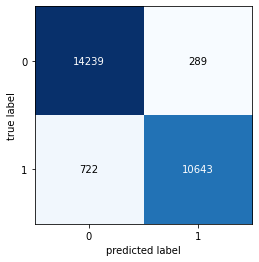

In [29]:
b = ohe.inverse_transform(mymodel.predict(test_X))
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#c = ohe.inverse_transform(val_y)
cm = confusion_matrix(test_y, b)
plot_confusion_matrix(cm)